In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
train_df = pd.read_csv('/Users/joel/Downloads/N/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Train.csv')
test_df = pd.read_csv('/Users/joel/Downloads/N/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Test.csv')

In [3]:
X_train = train_df.drop(columns=['genres'])
y_train = train_df['genres']

In [4]:
# Classification problem requires validation set, clustering does not
# We use a 60-20-20 split for classification, and an 75-25 split for clustering
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [5]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
18629,0.152514,0.684118,292790.588235,0.582059,2.512353e-06,0.324165,-11.494706,0.085300,119.951000,0.635824,46.647059,5,0,34,4093
7256,0.110815,0.639500,270396.625000,0.734875,1.022312e-04,0.069687,-10.153500,0.035987,125.001875,0.673000,40.750000,4,1,16,795
6407,0.511591,0.639217,208689.260870,0.534348,5.304348e-07,0.187648,-8.348304,0.034348,129.692391,0.496304,39.695652,4,1,46,2240
18913,0.088451,0.663519,206259.092593,0.716407,1.901248e-04,0.192709,-5.128296,0.101763,115.466852,0.624815,64.648148,0,1,54,3886
11081,0.395750,0.472500,261716.500000,0.805250,2.145575e-01,0.158300,-7.381750,0.041600,111.086000,0.694000,36.250000,7,1,8,777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.855000,0.631000,269133.000000,0.324000,0.000000e+00,0.074200,-8.830000,0.042500,119.064000,0.447000,57.000000,4,1,2,4718
11964,0.239708,0.754515,231926.886598,0.738402,1.943326e-04,0.170296,-4.753938,0.097689,127.830938,0.668474,60.010309,7,0,97,6250
5390,0.699550,0.318850,160508.800000,0.330200,5.105340e-04,0.157735,-12.201400,0.035920,111.960400,0.397020,21.850000,7,1,40,3776
860,0.128000,0.819000,307440.000000,0.428000,1.510000e-03,0.211000,-9.883000,0.317000,87.900000,0.454000,55.000000,5,0,1,6487


In [6]:
X_valid

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
15671,0.011463,0.560000,252424.000000,0.884000,0.113356,0.349813,-4.203875,0.081638,119.750250,0.463250,50.375000,2,1,16,1263
8048,0.665833,0.527667,149444.500000,0.270500,0.201406,0.084183,-16.250167,0.037000,127.041833,0.485167,10.500000,9,1,12,7431
7153,0.318000,0.531000,209716.500000,0.615500,0.000000,0.172250,-6.244500,0.126450,114.480500,0.474500,63.500000,2,1,2,7602
1087,0.858064,0.408936,157726.961538,0.312526,0.001029,0.198821,-11.307974,0.032046,93.516936,0.423154,28.756410,3,1,156,8494
17360,0.075053,0.668125,246726.750000,0.550625,0.000902,0.149375,-14.332375,0.037012,122.263625,0.821625,32.500000,9,1,16,6274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,0.837560,0.244669,294471.941292,0.198553,0.731984,0.168493,-19.996155,0.045730,103.934483,0.141831,28.512720,0,1,511,5054
252,0.334891,0.503174,200183.434783,0.499609,0.117946,0.160704,-7.466087,0.083709,103.786435,0.286826,72.000000,5,1,23,4755
6876,0.000148,0.665000,249600.000000,0.913000,0.412000,0.384000,-2.299000,0.046100,100.005000,0.439000,51.000000,1,1,2,2316
511,0.005470,0.407000,155199.666667,0.799000,0.000000,0.159133,-6.340333,0.068633,166.578000,0.590667,51.666667,7,1,6,2406


In [7]:
artists_encoded_train = X_train[['Artists_encoded','key','mode']]
artists_encoded_valid = X_valid[['Artists_encoded','key','mode']]
X_train = X_train.drop(columns=['Artists_encoded','key','mode'])
X_valid = X_valid.drop(columns=['Artists_encoded','key','mode'])

In [8]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count
18629,0.152514,0.684118,292790.588235,0.582059,2.512353e-06,0.324165,-11.494706,0.085300,119.951000,0.635824,46.647059,34
7256,0.110815,0.639500,270396.625000,0.734875,1.022312e-04,0.069687,-10.153500,0.035987,125.001875,0.673000,40.750000,16
6407,0.511591,0.639217,208689.260870,0.534348,5.304348e-07,0.187648,-8.348304,0.034348,129.692391,0.496304,39.695652,46
18913,0.088451,0.663519,206259.092593,0.716407,1.901248e-04,0.192709,-5.128296,0.101763,115.466852,0.624815,64.648148,54
11081,0.395750,0.472500,261716.500000,0.805250,2.145575e-01,0.158300,-7.381750,0.041600,111.086000,0.694000,36.250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.855000,0.631000,269133.000000,0.324000,0.000000e+00,0.074200,-8.830000,0.042500,119.064000,0.447000,57.000000,2
11964,0.239708,0.754515,231926.886598,0.738402,1.943326e-04,0.170296,-4.753938,0.097689,127.830938,0.668474,60.010309,97
5390,0.699550,0.318850,160508.800000,0.330200,5.105340e-04,0.157735,-12.201400,0.035920,111.960400,0.397020,21.850000,40
860,0.128000,0.819000,307440.000000,0.428000,1.510000e-03,0.211000,-9.883000,0.317000,87.900000,0.454000,55.000000,1


In [9]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [10]:
X_train_scaled.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
dtype: int64

In [11]:
artists_encoded_train = artists_encoded_train.reset_index(drop=True)
artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

X_train_scaled[['Artists_encoded','key','mode']] = artists_encoded_train
X_valid_scaled[['Artists_encoded','key','mode']] = artists_encoded_valid

print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Validation set shape:", X_valid_scaled.shape, y_valid.shape)


Training set shape: (15310, 15) (15310,)
Validation set shape: (5104, 15) (5104,)


In [12]:
X_train_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,mode
0,-0.577992,0.686295,0.683235,-0.094437,-0.463518,1.355703,-0.612333,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5,0
1,-0.731851,0.362544,0.359663,0.688777,-0.462981,-1.227454,-0.280344,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4,1
2,0.746930,0.360494,-0.531952,-0.338965,-0.463529,-0.030058,0.166498,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4,1
3,-0.814370,0.536825,-0.567066,0.594127,-0.462508,0.021320,0.963548,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0,1
4,0.319500,-0.849226,0.234243,1.049463,0.692151,-0.327963,0.405750,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-1.417040,-0.463532,-1.181648,0.047263,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4,1
15306,-0.256262,1.197109,-0.196190,0.706854,-0.462485,-0.206194,1.056213,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7,0
15307,1.440459,-1.964127,-1.228116,-1.385264,-0.460782,-0.333698,-0.787261,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7,1
15308,-0.668442,1.665016,0.894906,-0.884019,-0.455398,0.206987,-0.213386,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5,0


In [13]:
X_train_scaled.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
Artists_encoded     0
key                 0
mode                0
dtype: int64

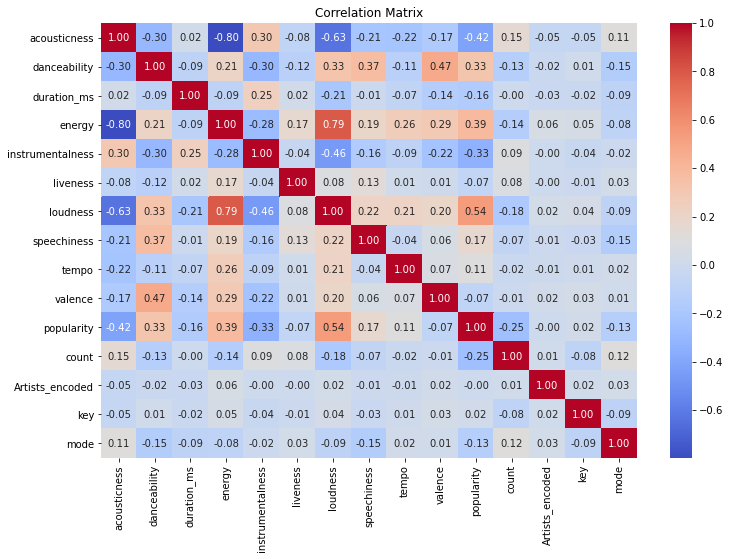

In [14]:
corr_matrix = X_train_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
corr_matrix = X_train_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
X_selected = X_train_scaled.drop(columns=to_drop)
X_selected

<ipython-input-15-4fcf1223239f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,acousticness,danceability,duration_ms,instrumentalness,liveness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,mode
0,-0.577992,0.686295,0.683235,-0.463518,1.355703,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5,0
1,-0.731851,0.362544,0.359663,-0.462981,-1.227454,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4,1
2,0.746930,0.360494,-0.531952,-0.463529,-0.030058,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4,1
3,-0.814370,0.536825,-0.567066,-0.462508,0.021320,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0,1
4,0.319500,-0.849226,0.234243,0.692151,-0.327963,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-0.463532,-1.181648,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4,1
15306,-0.256262,1.197109,-0.196190,-0.462485,-0.206194,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7,0
15307,1.440459,-1.964127,-1.228116,-0.460782,-0.333698,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7,1
15308,-0.668442,1.665016,0.894906,-0.455398,0.206987,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5,0


In [16]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Selected by Random Forest:")
print(feature_importance_df)

Top Features Selected by Random Forest:
             Feature  Importance
10        popularity    0.082090
7        speechiness    0.081172
0       acousticness    0.080359
2        duration_ms    0.079196
1       danceability    0.079049
9            valence    0.074714
6           loudness    0.074335
3             energy    0.072722
4   instrumentalness    0.069063
8              tempo    0.065738
5           liveness    0.063810
12   Artists_encoded    0.063692
11             count    0.058163
13               key    0.044281
14              mode    0.011615


In [17]:
X_train_scaled1 = X_train_scaled.drop(columns=['mode','energy'])
X_valid_scaled1 = X_valid_scaled.drop(columns=['mode','energy'])

In [18]:
X_train_scaled1

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key
0,-0.577992,0.686295,0.683235,-0.463518,1.355703,-0.612333,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5
1,-0.731851,0.362544,0.359663,-0.462981,-1.227454,-0.280344,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4
2,0.746930,0.360494,-0.531952,-0.463529,-0.030058,0.166498,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4
3,-0.814370,0.536825,-0.567066,-0.462508,0.021320,0.963548,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0
4,0.319500,-0.849226,0.234243,0.692151,-0.327963,0.405750,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-0.463532,-1.181648,0.047263,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4
15306,-0.256262,1.197109,-0.196190,-0.462485,-0.206194,1.056213,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7
15307,1.440459,-1.964127,-1.228116,-0.460782,-0.333698,-0.787261,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7
15308,-0.668442,1.665016,0.894906,-0.455398,0.206987,-0.213386,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5


In [19]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
# We are choosing 100 classifiers because we know that our labelled data truly falls into 100 unique genres
n_clusters = 100

# Fit the KMeans model on the scaled training data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled1)

# Predict cluster labels for the training data
train_labels = kmeans.predict(X_train_scaled1)

# Use the model on the validation data
valid_labels = kmeans.predict(X_valid_scaled1)

# Analyze results
# For example, you can check the size of each cluster
print("Cluster counts in training data:")
print(pd.Series(train_labels).value_counts())

# You can also examine the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Add cluster labels to your DataFrame
X_train_scaled1['Cluster'] = train_labels
X_valid_scaled1['Cluster'] = valid_labels


Cluster counts in training data:
19    200
78    198
0     195
72    191
48    190
     ... 
87    121
21    119
7     108
50    102
91     76
Length: 100, dtype: int64
Cluster centers:
[[ 2.30418145e-01 -4.65803204e-01 -3.86522033e-01 ...  2.48711402e-01
   8.43643814e+03  5.60824742e+00]
 [ 1.19470023e-01 -7.83022331e-02 -4.22983481e-02 ... -1.44441099e-02
   3.82825000e+03  4.51086957e+00]
 [-1.57030745e-01 -1.32649554e-02 -6.72636277e-02 ... -6.00264776e-02
   1.17616279e+03  5.31976744e+00]
 ...
 [ 4.43003019e-01 -2.29210627e-01  1.75597074e-01 ...  9.40877040e-02
   4.80611724e+03  5.40689655e+00]
 [-2.78425284e-01  1.62323479e-01 -4.05961134e-02 ... -2.30644851e-01
   6.04006849e+02  4.70547945e+00]
 [-9.60029247e-03  5.51714390e-02 -9.63317478e-02 ... -1.06125808e-01
   1.36662585e+03  5.03401361e+00]]


In [20]:
from sklearn.cluster import AgglomerativeClustering

# Step 1: Reattach the Genres to the Scaled Data
X_train_scaled1['genre'] = y_train.values

# Step 2: Perform Hierarchical Clustering with 6 Clusters
n_clusters = 6
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
train_labels = hierarchical.fit_predict(X_train_scaled1.drop(columns = 'genre'))

# Adding cluster labels to DataFrame
X_train_scaled1['Cluster'] = train_labels

# Step 3: Analyze Cluster Assignments
# Mapping each original genre to its most common new cluster
cluster_genre_mapping = X_train_scaled1.groupby('genre')['Cluster'].agg(lambda x:x.value_counts().index[0])

# Display the mapping
print(cluster_genre_mapping)

genre
adult standards        1
album rock             3
alternative hip hop    4
alternative metal      2
alternative rock       3
                      ..
tropical               0
tropical house         2
underground hip hop    0
urban contemporary     1
vocal jazz             1
Name: Cluster, Length: 100, dtype: int64


In [21]:
# Initialize a dictionary to hold genres for each cluster
genres_in_clusters = {cluster: [] for cluster in range(n_clusters)}

# Populate the dictionary with genres based on the mapping
for genre, cluster in cluster_genre_mapping.items():
    genres_in_clusters[cluster].append(genre)

# Display the genres assigned to each cluster based on the mapping
for cluster, genres in genres_in_clusters.items():
    print(f"Cluster {cluster}: {genres}")

Cluster 0: ['big band', 'ccm', 'classical', 'contemporary country', 'corrido', 'country', 'country road', 'electropop', 'folk', 'hard bop', 'hip pop', 'hollywood', 'jazz', 'jazz funk', 'latin', 'latin hip hop', 'neo mellow', 'neo soul', 'new jack swing', 'nuevo regional mexicano', 'pop dance', 'post-teen pop', 'reggaeton', 'regional mexican', 'show tunes', 'soft rock', 'soul jazz', 'traditional folk', 'tropical', 'underground hip hop']
Cluster 1: ['adult standards', 'bebop', 'classical performance', 'contemporary post-bop', 'cool jazz', 'dance pop', 'dirty south rap', 'electro house', 'gangster rap', 'hip hop', 'indie poptimism', 'mellow gold', 'movie tunes', 'pop', 'pop rap', 'post-disco', 'r&b', 'southern hip hop', 'urban contemporary', 'vocal jazz']
Cluster 2: ['alternative metal', 'edm', 'latin pop', 'rock en espanol', 'trap latino', 'tropical house']
Cluster 3: ['album rock', 'alternative rock', 'art rock', 'blues rock', 'brill building pop', 'bubblegum pop', 'classic rock', 'clas

Cluster 0: Contains a very diverse set of genres ranging from 'big band' to 'underground hip hop'. This diversity suggests that the cluster might be capturing a wide range of musical features, potentially indicating an overgeneralization.

Cluster 1: Appears to be more focused on genres related to jazz, pop, and hip hop. The presence of both older and more modern styles (like 'bebop' and 'pop rap') could indicate a blend of traditional and contemporary elements.

Cluster 2: Is smaller and seems to focus on genres like 'edm', 'latin pop', and 'rock en espanol'. The commonality here might be more in the rhythm and beat, typical of dance music.

Cluster 3: This is a large cluster with a focus on various forms of rock and alternative music. The inclusion of genres like 'classic rock', 'indie rock', and 'punk' suggests a focus on guitar-driven music with a broad range of styles.

Cluster 4: Centers around hip hop and metal genres. The pairing of these genres might indicate a focus on intense, energetic music.

Cluster 5: Is very small and specific, focusing on 'filmi' (a genre of Indian cinema music) and 'nu metal'. This specialization could either be very accurate or too narrow, depending on the nuances in the data.

Based on this analysis, I'm going to try adding one more cluster to get separation in Cluster 0.

In [22]:
# Perform Hierarchical Clustering with 7 Clusters
n_clusters = 7
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
train_labels = hierarchical.fit_predict(X_train_scaled1.drop(columns=['genre', 'Cluster']))

# Adding cluster labels to DataFrame
X_train_scaled1['Cluster'] = train_labels

# Re-map genres to new clusters
cluster_genre_mapping = X_train_scaled1.groupby('genre')['Cluster'].agg(lambda x: x.value_counts().index[0])

# Initialize a dictionary to hold genres for each cluster
genres_in_clusters = {cluster: [] for cluster in range(n_clusters)}

# Populate the dictionary with genres based on the mapping
for genre, cluster in cluster_genre_mapping.items():
    genres_in_clusters[cluster].append(genre)

# Display the genres assigned to each cluster based on the mapping
for cluster, genres in genres_in_clusters.items():
    print(f"Cluster {cluster}: {genres}")

Cluster 0: ['adult standards', 'bebop', 'big band', 'classical', 'contemporary country', 'contemporary post-bop', 'cool jazz', 'electropop', 'folk', 'hard bop', 'hard rock', 'hollywood', 'jazz', 'jazz funk', 'latin', 'lounge', 'mellow gold', 'neo mellow', 'neo soul', 'pop', 'post-disco', 'r&b', 'rap', 'reggaeton', 'roots rock', 'soft rock', 'soul jazz', 'southern hip hop', 'traditional folk', 'tropical', 'underground hip hop', 'vocal jazz']
Cluster 1: ['album rock', 'alternative metal', 'classical performance', 'dance pop', 'edm', 'electro house', 'electronica', 'gangster rap', 'hip pop', 'indie poptimism', 'latin pop', 'metal', 'modern rock', 'nu metal', 'pop dance', 'pop rap', 'post-teen pop', 'rock en espanol', 'show tunes', 'stomp and holler', 'trap', 'tropical house', 'urban contemporary']
Cluster 2: ['ccm', 'country', 'country road', 'country rock', 'dirty south rap', 'hardcore hip hop', 'latin hip hop', 'movie tunes']
Cluster 3: ['alternative hip hop', 'alternative rock', 'art r

Cluster 0: This cluster remains diverse, containing a mix of genres from 'adult standards' to 'underground hip hop'. It combines traditional genres like jazz and classical with contemporary ones like neo soul and electropop. The diversity suggests a broad range of musical elements, possibly capturing a mix of instrumental and vocal styles.

Cluster 1: This cluster seems to focus on modern, energetic genres, combining various forms of rock, EDM, and pop. The presence of 'gangster rap' and 'trap' indicates a blend of high-energy and rhythmic music styles.

Cluster 2: This cluster is more focused on country and rap subgenres. The combination of 'ccm', 'country', and 'dirty south rap' suggests a focus on specific regional styles and narratives.

Cluster 3: This is a large, diverse cluster covering a wide range of rock and alternative genres. The inclusion of genres like 'classic rock', 'indie rock', and 'psychedelic rock' indicates a focus on guitar-driven music with a broad stylistic range.

Cluster 4: Focuses on genres with strong regional or cultural ties, like 'corrido' and 'regional mexican'. This cluster might capture specific musical traditions and lyrical themes.

Cluster 5: Exclusively contains 'hip hop', which could indicate a clear delineation of this genre in your dataset. This separation might reflect distinct features characteristic of hip hop music.

Cluster 6: Dedicated to 'modern alternative rock', suggesting a distinct set of features that differentiate this genre from others in the dataset.

I'm okay with this, but I'm going to try two more clusters to see if we get more separation in either Cluster 0 or Cluster 3.

In [23]:
# Perform Hierarchical Clustering with 9 Clusters
n_clusters = 9
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
train_labels = hierarchical.fit_predict(X_train_scaled1.drop(columns=['genre', 'Cluster']))

# Adding cluster labels to DataFrame
X_train_scaled1['Cluster'] = train_labels

# Re-map genres to new clusters
cluster_genre_mapping = X_train_scaled1.groupby('genre')['Cluster'].agg(lambda x: x.value_counts().index[0])

# Initialize a dictionary to hold genres for each cluster
genres_in_clusters = {cluster: [] for cluster in range(n_clusters)}

# Populate the dictionary with genres based on the mapping
for genre, cluster in cluster_genre_mapping.items():
    genres_in_clusters[cluster].append(genre)

# Display the genres assigned to each cluster based on the mapping
for cluster, genres in genres_in_clusters.items():
    print(f"Cluster {cluster}: {genres}")

Cluster 0: ['adult standards', 'album rock', 'alternative hip hop', 'alternative metal', 'alternative rock', 'art rock', 'blues rock', 'brill building pop', 'bubblegum pop', 'classic rock', 'classic soul', 'classic uk pop', 'country rock', 'dance rock', 'disco', 'electronica', 'electropop', 'filmi', 'folk rock', 'funk', 'hard rock', 'indie folk', 'indie pop', 'indie rock', 'mellow gold', 'motown', 'new americana', 'new romantic', 'new wave', 'new wave pop', 'nu metal', 'pop punk', 'pop rock', 'post-disco', 'psychedelic rock', 'punk', 'quiet storm', 'rock', 'rock-and-roll', 'roots rock', 'soft rock', 'soul', 'stomp and holler']
Cluster 1: ['contemporary country', 'corrido', 'latin', 'latin pop', 'new jack swing', 'nuevo regional mexicano', 'pop dance', 'post-teen pop', 'reggaeton', 'regional mexican', 'rock en espanol', 'trap latino', 'tropical']
Cluster 2: ['bebop', 'big band', 'ccm', 'contemporary post-bop', 'cool jazz', 'country', 'country road', 'dirty south rap', 'electro house', '

Cluster 0: This cluster is very diverse, covering a wide range of rock and pop genres. It includes classic genres like 'classic rock' and 'disco' as well as more modern forms like 'indie rock' and 'new wave'. The cluster seems to capture a broad spectrum of guitar-driven and vocal-centric music.

Cluster 1: This cluster appears to focus on Latin-influenced genres and contemporary styles, with genres like 'reggaeton', 'latin pop', and 'corrido'. It seems to capture a mix of traditional and modern Latin music styles.

Cluster 2: This cluster combines jazz, country, and various forms of rap. It's an interesting mix, possibly indicating a blend of instrumental (jazz, country) and vocal/lyrical (rap) elements.

Cluster 3: This cluster is more focused, with genres like 'classical', 'folk', and 'traditional folk'. It likely represents more acoustic and traditional music styles.

Cluster 4: Focused on 'edm', 'hip pop', and 'tropical house', this cluster seems to capture modern, dance-oriented music.

Cluster 5: Contains genres such as 'dance pop', 'hip hop', and 'neo soul'. It appears to be a cluster for contemporary, rhythm-driven music.

Cluster 6: This cluster includes 'modern alternative rock', 'modern rock', and 'trap', suggesting a focus on modern rock and hip-hop influences.

Clusters 7 and 8: These clusters are empty, which indicates that no genres were mapped to these clusters. This could be a result of how the genre-to-cluster mapping was done or a sign that fewer clusters might be sufficient for my dataset.

I think the presence of empty clusters indicates over-segmentation. I am happy to end on seven clusters as a natural separation for this data set.

Since these clusters are not great to our intuitive eye, I will ask Chat-GPT to cluster based on labels. Additionally, this will be more interesting because it provides some sense of ground truth labelling, whereas clustering leads to its own issues and unecessary errors in the ground truth labelling.

In [24]:
# Extracting unique genres (this is just the 100 unique genres)
unique_genres = set()
for genres in genres_in_clusters.values():
    unique_genres.update(genres)

# Formatting as a single Python list
unique_genres_list = sorted(list(unique_genres))
print(unique_genres_list)

['adult standards', 'album rock', 'alternative hip hop', 'alternative metal', 'alternative rock', 'art rock', 'bebop', 'big band', 'blues rock', 'brill building pop', 'bubblegum pop', 'ccm', 'classic rock', 'classic soul', 'classic uk pop', 'classical', 'classical performance', 'contemporary country', 'contemporary post-bop', 'cool jazz', 'corrido', 'country', 'country road', 'country rock', 'dance pop', 'dance rock', 'dirty south rap', 'disco', 'edm', 'electro house', 'electronica', 'electropop', 'filmi', 'folk', 'folk rock', 'funk', 'gangster rap', 'hard bop', 'hard rock', 'hardcore hip hop', 'hip hop', 'hip pop', 'hollywood', 'indie folk', 'indie pop', 'indie poptimism', 'indie rock', 'jazz', 'jazz funk', 'latin', 'latin hip hop', 'latin pop', 'lounge', 'mellow gold', 'metal', 'modern alternative rock', 'modern rock', 'motown', 'movie tunes', 'neo mellow', 'neo soul', 'new americana', 'new jack swing', 'new romantic', 'new wave', 'new wave pop', 'nu metal', 'nuevo regional mexicano'

In [25]:
# These are ChatGPT's initial attempt
rock_and_alternative = [
    'album rock', 'alternative rock', 'art rock', 'blues rock', 
    'classic rock', 'folk rock', 'hard rock', 'indie rock', 
    'modern alternative rock', 'modern rock', 'psychedelic rock', 
    'rock', 'rock en espanol', 'rock-and-roll', 'roots rock'
]

pop_and_dance = [
    'brill building pop', 'bubblegum pop', 'dance pop', 'dance rock', 
    'disco', 'edm', 'electropop', 'filmi', 'hip pop', 
    'indie poptimism', 'new romantic', 'new wave', 'new wave pop', 
    'pop', 'pop dance', 'pop punk', 'pop rap', 'pop rock', 
    'post-teen pop', 'show tunes', 'soft rock', 'stomp and holler', 
    'traditional folk', 'tropical house'
]

hip_hop_and_rap = [
    'alternative hip hop', 'dirty south rap', 'gangster rap', 'hardcore hip hop', 
    'hip hop', 'latin hip hop', 'rap', 'southern hip hop', 'trap', 
    'trap latino', 'underground hip hop'
]

jazz_and_blues = [
    'bebop', 'big band', 'cool jazz', 'hard bop', 'jazz', 
    'jazz funk', 'lounge', 'mellow gold', 'neo soul', 
    'quiet storm', 'soul jazz', 'vocal jazz'
]

country_and_americana = [
    'ccm', 'contemporary country', 'country', 'country road', 
    'country rock', 'folk', 'indie folk', 'new americana', 
    'regional mexican'
]

soul_rnb_and_related = [
    'classic soul', 'funk', 'motown', 'neo mellow', 'neo soul', 
    'r&b', 'soul', 'urban contemporary'
]

latin_tropical_and_regional = [
    'corrido', 'latin', 'latin pop', 'nuevo regional mexicano', 
    'reggaeton', 'tropical', 'tropical house'
]

excluded_genres = [
    'adult standards', 'alternative metal', 'classical', 'classical performance', 
    'contemporary post-bop', 'electro house', 'electronica', 'hollywood', 
    'indie pop', 'metal', 'movie tunes', 'nu metal', 'new jack swing', 
    'post-disco', 'punk'
]

In [26]:
# Calculating the total count
total_genre_count = (
    len(rock_and_alternative) + len(pop_and_dance) + len(hip_hop_and_rap) + 
    len(jazz_and_blues) + len(country_and_americana) + len(soul_rnb_and_related) + 
    len(latin_tropical_and_regional) + len(excluded_genres)
)

print(f"Total number of genres: {total_genre_count}")

Total number of genres: 101


I checked ChatGPT because I wasn't confident in its counting ability. Sure enough, it added one genre. I'll now use a Python process to create the sets, using ChatGPT's guidance as a recommendation, but ensuring each genre is used exactly once.

In [27]:
# The eight list titles
list_titles = [
    'Rock and Alternative', 'Pop and Dance', 'Hip Hop and Rap', 
    'Jazz and Blues', 'Country and Americana', 'Soul, R&B, and Related Genres', 
    'Latin, Tropical, and Regional Varieties', 'Excluded Genres'
]

# Corrected genre lists for mapping
genre_lists = {
    'Rock and Alternative': rock_and_alternative,
    'Pop and Dance': pop_and_dance,
    'Hip Hop and Rap': hip_hop_and_rap,
    'Jazz and Blues': jazz_and_blues,
    'Country and Americana': country_and_americana,
    'Soul, R&B, and Related Genres': soul_rnb_and_related,
    'Latin, Tropical, and Regional Varieties': latin_tropical_and_regional,
    'Excluded Genres': excluded_genres
}

# Creating a dictionary with list titles as keys and empty lists as values
genre_dict = {title: [] for title in list_titles}

# Iterating through unique genres and adding them to the appropriate list in the dictionary
for genre in unique_genres_list:
    for title, genres in genre_lists.items():
        if genre in genres:
            genre_dict[title].append(genre)
            break  # Break after adding to the first matching list

# Printing the resulting dictionary
for title, genres in genre_dict.items():
    print(f"{title}: {genres}\n")

Rock and Alternative: ['album rock', 'alternative rock', 'art rock', 'blues rock', 'classic rock', 'folk rock', 'hard rock', 'indie rock', 'modern alternative rock', 'modern rock', 'psychedelic rock', 'rock', 'rock en espanol', 'rock-and-roll', 'roots rock']

Pop and Dance: ['brill building pop', 'bubblegum pop', 'dance pop', 'dance rock', 'disco', 'edm', 'electropop', 'filmi', 'hip pop', 'indie poptimism', 'new romantic', 'new wave', 'new wave pop', 'pop', 'pop dance', 'pop punk', 'pop rap', 'pop rock', 'post-teen pop', 'show tunes', 'soft rock', 'stomp and holler', 'traditional folk', 'tropical house']

Hip Hop and Rap: ['alternative hip hop', 'dirty south rap', 'gangster rap', 'hardcore hip hop', 'hip hop', 'latin hip hop', 'rap', 'southern hip hop', 'trap', 'trap latino', 'underground hip hop']

Jazz and Blues: ['bebop', 'big band', 'cool jazz', 'hard bop', 'jazz', 'jazz funk', 'lounge', 'mellow gold', 'neo soul', 'quiet storm', 'soul jazz', 'vocal jazz']

Country and Americana: ['

We now know that every genre is included at most once, since we added elements by iterating through the list of unique genres.

Let's create a new dataframe for classification, replacing genres that fall into the seven new clusters and dropping genres that fall into the cluster for exclusion or that disappeared while using chatGPT.

In [28]:
X_train_scaled1

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,Cluster,genre
0,-0.577992,0.686295,0.683235,-0.463518,1.355703,-0.612333,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5,3,neo soul
1,-0.731851,0.362544,0.359663,-0.462981,-1.227454,-0.280344,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4,5,new romantic
2,0.746930,0.360494,-0.531952,-0.463529,-0.030058,0.166498,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4,2,country road
3,-0.814370,0.536825,-0.567066,-0.462508,0.021320,0.963548,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0,3,pop
4,0.319500,-0.849226,0.234243,0.692151,-0.327963,0.405750,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7,5,indie pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-0.463532,-1.181648,0.047263,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4,1,rock en espanol
15306,-0.256262,1.197109,-0.196190,-0.462485,-0.206194,1.056213,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7,4,trap latino
15307,1.440459,-1.964127,-1.228116,-0.460782,-0.333698,-0.787261,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7,3,lounge
15308,-0.668442,1.665016,0.894906,-0.455398,0.206987,-0.213386,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5,8,alternative hip hop


In [29]:
X_valid_scaled1

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,Cluster
0,-1.098441,-0.214316,0.099975,0.147045,1.616050,1.192371,-0.053263,0.008786,-0.465767,0.389152,-0.263442,1263,2,56
1,1.316052,-0.448931,-1.387985,0.621315,-1.080309,-1.789455,-0.629096,0.410012,-0.347177,-2.342839,-0.317854,7431,9,67
2,0.032619,-0.424744,-0.517110,-0.463532,-0.186358,0.687254,0.524827,-0.281187,-0.404893,1.288397,-0.453886,7602,2,57
3,2.025343,-1.310454,-1.268311,-0.457991,0.083355,-0.566111,-0.693002,-1.434727,-0.682725,-1.092022,1.641005,8494,3,43
4,-0.863805,0.570250,0.017655,-0.458672,-0.418559,-1.314743,-0.628935,0.147087,1.473383,-0.835534,-0.263442,6274,9,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,1.949688,-2.502392,0.707529,3.479194,-0.224494,-2.716702,-0.516483,-0.861491,-2.204952,-1.108718,6.470136,5054,0,15
5100,0.094944,-0.626653,-0.654854,0.171766,-0.303556,0.384874,-0.026544,-0.869638,-1.420388,1.870765,-0.168219,4755,5,25
5101,-1.140189,0.547575,0.059171,1.755646,1.963081,1.663886,-0.511704,-1.077715,-0.596982,0.431973,-0.453886,2316,1,55
5102,-1.120552,-1.324501,-1.304828,-0.463532,-0.319504,0.663532,-0.221020,2.585527,0.223679,0.477649,-0.399473,2406,7,29


In [30]:
X_train_scaled2 = X_train_scaled1.drop(columns = 'Cluster')
X_train_scaled2

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,genre
0,-0.577992,0.686295,0.683235,-0.463518,1.355703,-0.612333,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5,neo soul
1,-0.731851,0.362544,0.359663,-0.462981,-1.227454,-0.280344,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4,new romantic
2,0.746930,0.360494,-0.531952,-0.463529,-0.030058,0.166498,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4,country road
3,-0.814370,0.536825,-0.567066,-0.462508,0.021320,0.963548,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0,pop
4,0.319500,-0.849226,0.234243,0.692151,-0.327963,0.405750,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7,indie pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-0.463532,-1.181648,0.047263,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4,rock en espanol
15306,-0.256262,1.197109,-0.196190,-0.462485,-0.206194,1.056213,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7,trap latino
15307,1.440459,-1.964127,-1.228116,-0.460782,-0.333698,-0.787261,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7,lounge
15308,-0.668442,1.665016,0.894906,-0.455398,0.206987,-0.213386,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5,alternative hip hop


In [31]:
X_valid_scaled2 = X_valid_scaled1.drop(columns = 'Cluster')
X_valid_scaled2

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key
0,-1.098441,-0.214316,0.099975,0.147045,1.616050,1.192371,-0.053263,0.008786,-0.465767,0.389152,-0.263442,1263,2
1,1.316052,-0.448931,-1.387985,0.621315,-1.080309,-1.789455,-0.629096,0.410012,-0.347177,-2.342839,-0.317854,7431,9
2,0.032619,-0.424744,-0.517110,-0.463532,-0.186358,0.687254,0.524827,-0.281187,-0.404893,1.288397,-0.453886,7602,2
3,2.025343,-1.310454,-1.268311,-0.457991,0.083355,-0.566111,-0.693002,-1.434727,-0.682725,-1.092022,1.641005,8494,3
4,-0.863805,0.570250,0.017655,-0.458672,-0.418559,-1.314743,-0.628935,0.147087,1.473383,-0.835534,-0.263442,6274,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,1.949688,-2.502392,0.707529,3.479194,-0.224494,-2.716702,-0.516483,-0.861491,-2.204952,-1.108718,6.470136,5054,0
5100,0.094944,-0.626653,-0.654854,0.171766,-0.303556,0.384874,-0.026544,-0.869638,-1.420388,1.870765,-0.168219,4755,5
5101,-1.140189,0.547575,0.059171,1.755646,1.963081,1.663886,-0.511704,-1.077715,-0.596982,0.431973,-0.453886,2316,1
5102,-1.120552,-1.324501,-1.304828,-0.463532,-0.319504,0.663532,-0.221020,2.585527,0.223679,0.477649,-0.399473,2406,7


In [32]:
#Reattach the Genres to the Scaled Data
X_valid_scaled2['genre'] = y_valid.values

In [33]:
X_valid_scaled2

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,genre
0,-1.098441,-0.214316,0.099975,0.147045,1.616050,1.192371,-0.053263,0.008786,-0.465767,0.389152,-0.263442,1263,2,alternative metal
1,1.316052,-0.448931,-1.387985,0.621315,-1.080309,-1.789455,-0.629096,0.410012,-0.347177,-2.342839,-0.317854,7431,9,lounge
2,0.032619,-0.424744,-0.517110,-0.463532,-0.186358,0.687254,0.524827,-0.281187,-0.404893,1.288397,-0.453886,7602,2,hollywood
3,2.025343,-1.310454,-1.268311,-0.457991,0.083355,-0.566111,-0.693002,-1.434727,-0.682725,-1.092022,1.641005,8494,3,brill building pop
4,-0.863805,0.570250,0.017655,-0.458672,-0.418559,-1.314743,-0.628935,0.147087,1.473383,-0.835534,-0.263442,6274,9,mellow gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,1.949688,-2.502392,0.707529,3.479194,-0.224494,-2.716702,-0.516483,-0.861491,-2.204952,-1.108718,6.470136,5054,0,classical performance
5100,0.094944,-0.626653,-0.654854,0.171766,-0.303556,0.384874,-0.026544,-0.869638,-1.420388,1.870765,-0.168219,4755,5,pop
5101,-1.140189,0.547575,0.059171,1.755646,1.963081,1.663886,-0.511704,-1.077715,-0.596982,0.431973,-0.453886,2316,1,electro house
5102,-1.120552,-1.324501,-1.304828,-0.463532,-0.319504,0.663532,-0.221020,2.585527,0.223679,0.477649,-0.399473,2406,7,post-teen pop


In [34]:
# Assuming X_train_scaled2 is already defined and has a 'genre' column
# and genre_dict is defined

# Function to map genre to its cluster
def map_genre_to_cluster(genre):
    for cluster, genres in genre_dict.items():
        if genre in genres:
            return cluster
    return pd.NA  # Return a pandas null value if genre is not in any cluster

# Apply the function to the 'genre' column to create a new 'genre_cluster' column
X_train_scaled2['genre'] = X_train_scaled2['genre'].apply(map_genre_to_cluster)

# Display the updated DataFrame
print(X_train_scaled2.head())

   acousticness  danceability  duration_ms  instrumentalness  liveness  \
0     -0.577992      0.686295     0.683235         -0.463518  1.355703   
1     -0.731851      0.362544     0.359663         -0.462981 -1.227454   
2      0.746930      0.360494    -0.531952         -0.463529 -0.030058   
3     -0.814370      0.536825    -0.567066         -0.462508  0.021320   
4      0.319500     -0.849226     0.234243          0.692151 -0.327963   

   loudness  speechiness     tempo   valence  popularity     count  \
0 -0.612333    -0.006016  0.019832  0.468020    0.133736 -0.018584   
1 -0.280344    -0.642157  0.297761  0.669181   -0.270294 -0.263442   
2  0.166498    -0.663310  0.555861 -0.286911   -0.342532  0.144654   
3  0.963548     0.206359 -0.226912  0.408453    1.367061  0.253480   
4  0.405750    -0.569755 -0.467973  0.782811   -0.578607 -0.372267   

   Artists_encoded  key                  genre  
0             4093    5         Jazz and Blues  
1              795    4          Pop

In [35]:
print(len(X_train_scaled2))

15310


In [36]:
# Dropping rows where 'genre' is null
X_train_scaled2.dropna(subset=['genre'], inplace=True)

# Display the updated DataFrame
print(X_train_scaled2.head())

   acousticness  danceability  duration_ms  instrumentalness  liveness  \
0     -0.577992      0.686295     0.683235         -0.463518  1.355703   
1     -0.731851      0.362544     0.359663         -0.462981 -1.227454   
2      0.746930      0.360494    -0.531952         -0.463529 -0.030058   
3     -0.814370      0.536825    -0.567066         -0.462508  0.021320   
4      0.319500     -0.849226     0.234243          0.692151 -0.327963   

   loudness  speechiness     tempo   valence  popularity     count  \
0 -0.612333    -0.006016  0.019832  0.468020    0.133736 -0.018584   
1 -0.280344    -0.642157  0.297761  0.669181   -0.270294 -0.263442   
2  0.166498    -0.663310  0.555861 -0.286911   -0.342532  0.144654   
3  0.963548     0.206359 -0.226912  0.408453    1.367061  0.253480   
4  0.405750    -0.569755 -0.467973  0.782811   -0.578607 -0.372267   

   Artists_encoded  key                  genre  
0             4093    5         Jazz and Blues  
1              795    4          Pop

In [37]:
# Check that some values were dropped, length should decrease
print(len(X_train_scaled2))

15210


In [38]:
# Apply the function to the 'genre' column to create a new 'genre_cluster' column
X_valid_scaled2['genre'] = X_valid_scaled2['genre'].apply(map_genre_to_cluster)

# Dropping rows where 'genre' is null
X_valid_scaled2.dropna(subset=['genre'], inplace=True)

# Display the updated DataFrame
print(X_valid_scaled2.head())

   acousticness  danceability  duration_ms  instrumentalness  liveness  \
0     -1.098441     -0.214316     0.099975          0.147045  1.616050   
1      1.316052     -0.448931    -1.387985          0.621315 -1.080309   
2      0.032619     -0.424744    -0.517110         -0.463532 -0.186358   
3      2.025343     -1.310454    -1.268311         -0.457991  0.083355   
4     -0.863805      0.570250     0.017655         -0.458672 -0.418559   

   loudness  speechiness     tempo   valence  popularity     count  \
0  1.192371    -0.053263  0.008786 -0.465767    0.389152 -0.263442   
1 -1.789455    -0.629096  0.410012 -0.347177   -2.342839 -0.317854   
2  0.687254     0.524827 -0.281187 -0.404893    1.288397 -0.453886   
3 -0.566111    -0.693002 -1.434727 -0.682725   -1.092022  1.641005   
4 -1.314743    -0.628935  0.147087  1.473383   -0.835534 -0.263442   

   Artists_encoded  key            genre  
0             1263    2  Excluded Genres  
1             7431    9   Jazz and Blues  
2    

In [39]:
X_valid_scaled2 = X_valid_scaled2[X_valid_scaled2['genre'] != 'Excluded Genres']

In [40]:
X_train_scaled2 = X_train_scaled2[X_train_scaled2['genre'] != 'Excluded Genres']

In [41]:
print(X_valid_scaled2.head())

   acousticness  danceability  duration_ms  instrumentalness  liveness  \
1      1.316052     -0.448931    -1.387985          0.621315 -1.080309   
3      2.025343     -1.310454    -1.268311         -0.457991  0.083355   
4     -0.863805      0.570250     0.017655         -0.458672 -0.418559   
5     -1.133282      0.424221    -0.301262          4.276459  2.105193   
6     -0.900818     -0.335032     0.178653         -0.463531  0.953073   

   loudness  speechiness     tempo   valence  popularity     count  \
1 -1.789455    -0.629096  0.410012 -0.347177   -2.342839 -0.317854   
3 -0.566111    -0.693002 -1.434727 -0.682725   -1.092022  1.641005   
4 -1.314743    -0.628935  0.147087  1.473383   -0.835534 -0.263442   
5  0.729458    -0.465263  0.297988 -0.559106   -1.623443 -0.453886   
6  0.566853     0.410074  0.280040 -1.041172    1.004999 -0.331458   

   Artists_encoded  key            genre  
1             7431    9   Jazz and Blues  
3             8494    3    Pop and Dance  
4    

In [42]:
print(X_train_scaled2.head())

   acousticness  danceability  duration_ms  instrumentalness  liveness  \
0     -0.577992      0.686295     0.683235         -0.463518  1.355703   
1     -0.731851      0.362544     0.359663         -0.462981 -1.227454   
2      0.746930      0.360494    -0.531952         -0.463529 -0.030058   
3     -0.814370      0.536825    -0.567066         -0.462508  0.021320   
7     -1.087104      0.453246     1.043443          1.690325 -0.478195   

   loudness  speechiness     tempo   valence  popularity     count  \
0 -0.612333    -0.006016  0.019832  0.468020    0.133736 -0.018584   
1 -0.280344    -0.642157  0.297761  0.669181   -0.270294 -0.263442   
2  0.166498    -0.663310  0.555861 -0.286911   -0.342532  0.144654   
3  0.963548     0.206359 -0.226912  0.408453    1.367061  0.253480   
7 -0.715131    -0.759388 -0.197575  1.618803   -0.287423 -0.426680   

   Artists_encoded  key                  genre  
0             4093    5         Jazz and Blues  
1              795    4          Pop

In [43]:
X_train_scaled2.to_csv('X_train_scaled2.csv', index=False)
X_valid_scaled2.to_csv('X_valid_scaled2.csv', index=False)